<a href="https://colab.research.google.com/github/Kaarunya29/Dream-Home-Interior/blob/main/Calorie_Burnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies


In [ ]:
import numpy as np #used to make arrays
import pandas as pd #used to make dataframe(Structure table).datafram is easy to analyze the data
import matplotlib.pyplot as plt #used to create plots and graphs
import seaborn as sns #it is data visualization library used to create plots and graphs
from sklearn.model_selection import train_test_split #split the data into train and test data
from xgboost import XGBRegressor #using xgboost regression
from sklearn import metrics#evaluate our model , how well out model is perfroming


Data Collection and processing

In [ ]:
#loading the data from CSV to a Pandas Dataframe
calories =pd.read_csv('/content/calories.csv')

In [ ]:
#print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv('/content/exercise.csv')
exercise_data.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining  the two dataframes

In [ ]:

calories_data =pd.concat([exercise_data,calories['Calories']],axis=1)#1 represent column, 0 represent rows ,__We are combining column so axis=1

#exercise parameters are used to find the calories
#see the 4 th data set he is doing light exercise hw is just going for a walk
#see the 3rd he is doing more intense exercise that why hear rate is more
#Heart rate is the indirect measurement of intensity of exercise that they are doing

#data will be after the last column
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
#checking the number of rows and columns
calories_data.shape


(15000, 9)

In [ ]:
#15000 difference people
#getting some information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
#Checking for missing values
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [ ]:
#If we have a missing value we need to process those missing values before replace the missing value with values such
#as mean mode median etc...

Data Analysis..

In [ ]:
#Get some statistical measures about the data
#it will the mean value of each column
calories_data.describe() # we dont have gender column we cannot find mean value fro text

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
#We dont need user Id column mean because it is just identification
 #If the heart rate and body temperature is more the person is doing exercise more
 #statistical measure is very helpful to find how much calories burnt


Data Visulaization

In [ ]:
sns.set()# it will give some basic theme for our clock for example) grid line in plots and background theme is our plot that is the reason for this


In [ ]:
#lets try to find the distribution of this gender column like how many males in the datapoint and how many females in the data point

<Axes: xlabel='count', ylabel='Gender'>

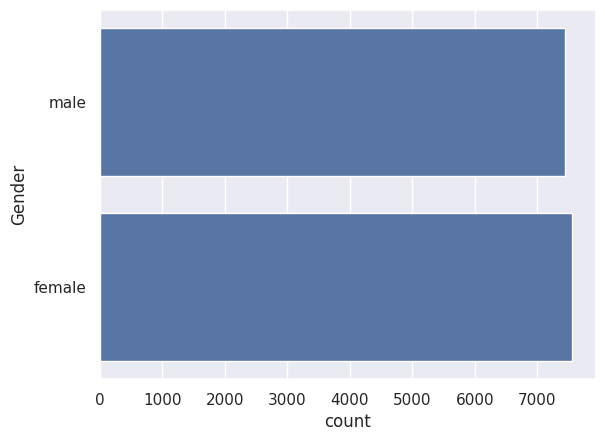

In [ ]:
#Plottinf the gender column in count plot
sns.countplot(calories_data['Gender'])#This is a categorical column so it contains value contain both male and female


In [ ]:
#If the males are high and females are low this not distributed data set but it is equal so it very good distributed data
#In weight and height column we cannot put in count plot because it very usedful for categorical columns
#age is also not a categorical because it does not contain two values like gender male or female,age varies a lot
#instead we are use a distributed plot to find the range of phase


<ipython-input-13-87f38b03d3f4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

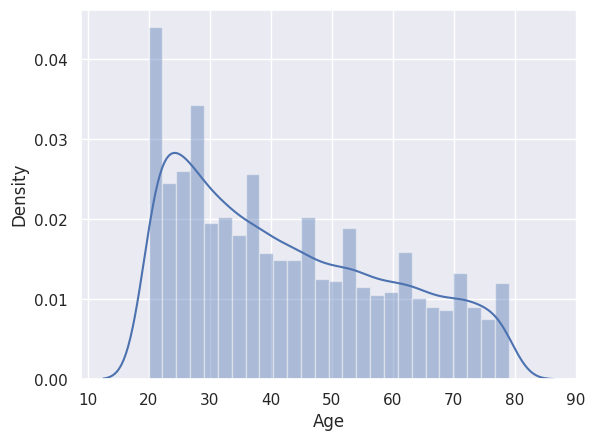

In [ ]:
#finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

In [ ]:
#from the above image, density means how much data is present for that particular age...More people are present in the age of 20 and 30 around 15000
#Everyone know less people come to gym at a older
#Finding the distribution of data is very helpful so it tell us which range of value is more


<ipython-input-14-f90218a2ae33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

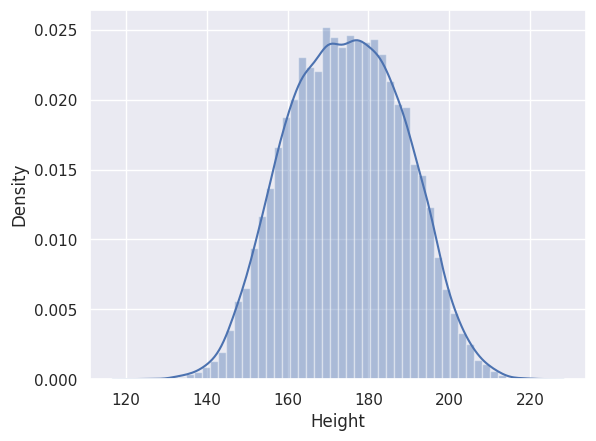

In [ ]:
#Find all othose value
#finding the distribution of "height" column
sns.distplot(calories_data['Height'])

<ipython-input-15-8661d3078e12>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

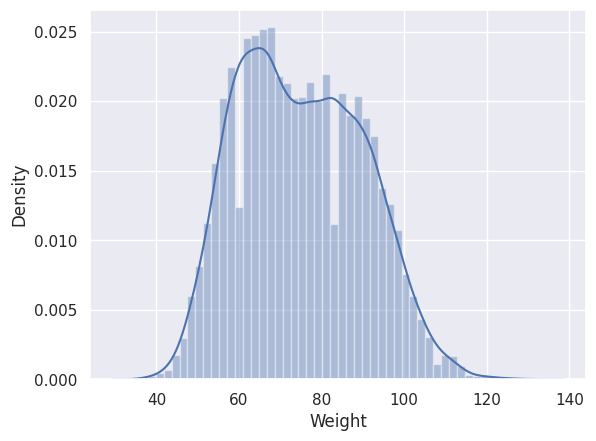

In [ ]:
#More people in the height of 160 to 200
#finding the distribution of "Weigth" column
sns.distplot(calories_data['Weight'])

<ipython-input-16-9ec790d880f3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

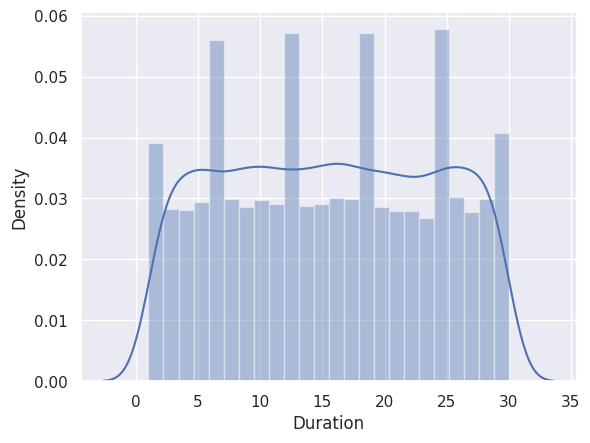

In [ ]:
#finding the distribution of "duration" column
sns.distplot(calories_data['Duration'])

In [ ]:
#If the duration is more the calories burnt is also more
#The calories and duration is directly proprtional to each other
#if the duration is increases the calories burnt also increases
#iF the calories decreases the duration is also decreases
# so that two columns are positively corrlated
#If the one column increase other column decrease it is negatively correlated

1.Positive correlation
2.Negative Correlation
If the duration is more the calories burnt is al

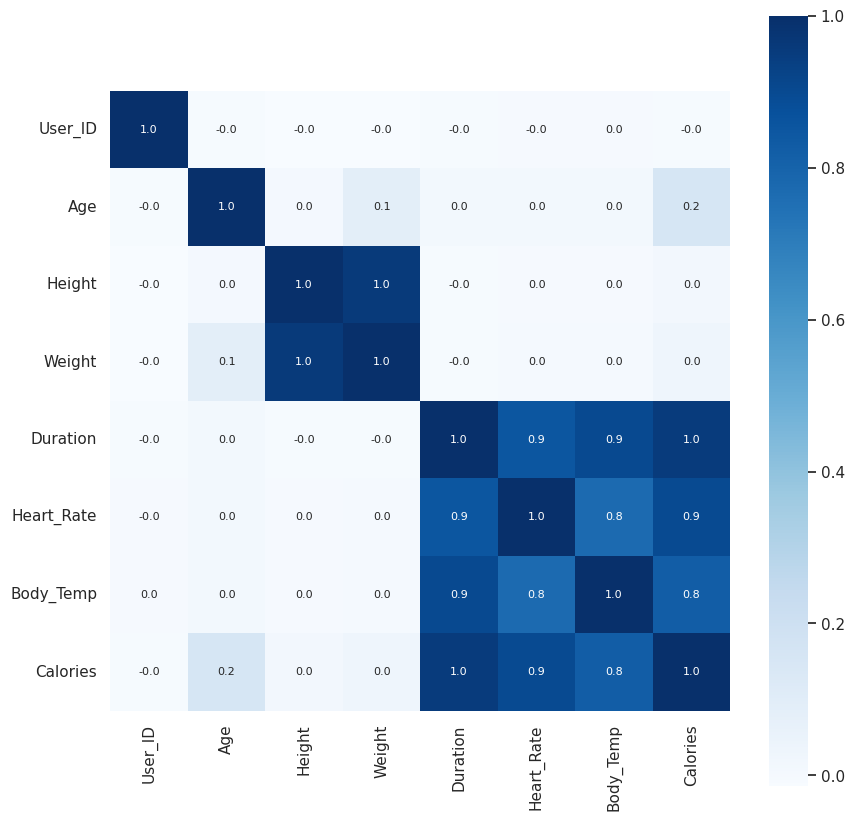

In [ ]:
# Dropping non-numeric columns
calories_data_numeric = calories_data.select_dtypes(include=[np.number])
# Calculating the correlation matrix
correlation = calories_data_numeric.corr()
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()


In [ ]:
#values based on you know gives colurs based on the value
#1 is highest value and 0 is the lowest value this is relationship between te data so the relationshipbetween this various feature
#Each column is compared to the other column if the value is larger is one it is positively correlated if the value is less there is negatively
#Correlated if the value is 0 there is no correlation
#diagonal is compare to same column so skip it
#duration and body temperature alos highly correlated because if the person do more exercise both are simulatanelouslu increases
#It also ensure that heart rate is more calories also burnt more



In [ ]:
#Gender is text so we cannot feed the data into machine learning model,because computer does not understand text
#We need to repace the appropriate value


Converting the text data to numberical value


In [ ]:
calories_data.replace({"Gender":{'male':0,'female':1}},inplace=True)#Inplace means permenant change if does not mention that change is temporary only
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# Drop 'User_ID' and store the remaining features in X
X = calories_data.drop(columns=['User_ID', 'Calories'])

# Store the 'Calories' column in the Y variable
Y = calories_data['Calories']
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


Separating feature and Target


In [ ]:
#Above table user ID and calories removed
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [ ]:
#Now we are successfully separeted into feature and target data


Splitting the data into training data and Test data

In [ ]:
#Separate into two arrays
#one is x train and x test
#X train represent all the training data and x test represents all the test data
#Training data is used for training the model and test data is used for evaluate the model.
#In calories have y train and y test
#The corresponding Xtrain data is stored in Ytrain, Xtest data is stored in Ydata
 #we are goinf to use the function train_test_function which is imported in sklearn
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
#random state=>reproduce the code, If we mention in 2 in random state it will split into same way what we split,,, if we give 3 it will split into different way

#20 % is test data 80% is train data
#generally 20 or 10% only the test daata and 80% or 90% of data is training data


In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model training XGBoost Regression

In [ ]:
#load the model

model = XGBRegressor()


In [ ]:
#Train the Model with X_train
model.fit(X_train,Y_train)#x train the feature and y train is the calories for the data



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluate the Model

In [ ]:
#Evaluate the data based on the test data


Prediction on test data


In [ ]:
test_data_prediction =model.predict(X_test)

In [ ]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Mean Absolute Error

In [ ]:
mae = metrics.mean_absolute_error(Y_test,test_data_prediction)
#Y_test is original and test is data predicted
print("Mean absolute error = ",mae)

Mean absolute error =  1.4833678883314132


In [ ]:
# Convert input data to a numpy array and reshape it for prediction
input_data=(1,	34	,179.0,71.0,13.0,100.0,40.5)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make a prediction
prediction = model.predict(input_data_reshaped)
print(prediction)

[70.502846]


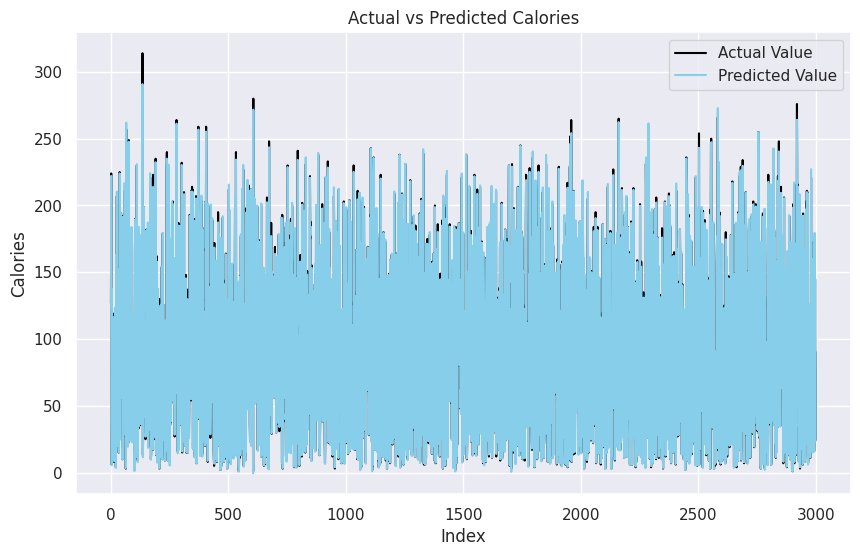

In [ ]:
# Plotting the difference between actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label='Actual Value', color='black')
plt.plot(test_data_prediction, label='Predicted Value', color='skyblue')
plt.xlabel('Index')
plt.ylabel('Calories')
plt.title('Actual vs Predicted Calories')
plt.legend()
plt.show()
